# Homework note

when plotting two algorithms with different asymptotics it is often more illustrative to use a log-log or semi-log plot

In [15]:
sizes = [10 50 100 500 1000 5000]
time_full = zeros(6)
time_r1 = zeros(6)
for i = 1:6
    n = sizes[i]
    A = randn(n, n)
    c = randn(1, n)
    v = randn(n, 1)
    
    tic()
    a = A * v
    time_full[i] = toq()
    
    tic()
    b = c * v
    time_r1[i] = toq()
end

In [16]:
using PyPlot

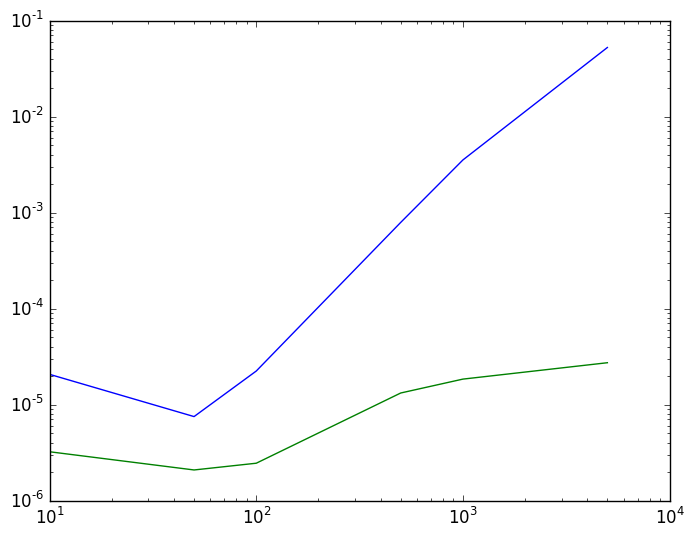

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa478792e90>

In [19]:
loglog(sizes', time_full)
loglog(sizes', time_r1)

# CME 257 - Julia Packages

(This IJulia notebook is tested using Julia [v0.4.0-rc3](https://github.com/JuliaLang/julia/releases))

Julia currently has [over 700 packages](http://pkg.julialang.org/pulse.html) registered.  This includes relatively mature and popular pacakges as well as packages that are just getting off the ground.

Today we'll look a bit more at the package manager and some popular Julia packages.

You have already used [Pkg.add()](http://julia.readthedocs.org/en/latest/stdlib/pkg/#Base.Pkg.add) to start using packages such as IJulia and PyPlot.  You can also add a version number to the arguments to use a particular version of a package.  You can use [Pkg.available()](http://julia.readthedocs.org/en/latest/stdlib/pkg/#Base.Pkg.available) to list available versions of a package.

In [20]:
Pkg.available("Gadfly")

61-element Array{VersionNumber,1}:
 v"0.0.0" 
 v"0.1.0" 
 v"0.1.1" 
 v"0.1.2" 
 v"0.1.3" 
 v"0.1.4" 
 v"0.1.5" 
 v"0.1.6" 
 v"0.1.7" 
 v"0.1.8" 
 v"0.1.9" 
 v"0.1.10"
 v"0.1.11"
 ⋮        
 v"0.3.6" 
 v"0.3.7" 
 v"0.3.8" 
 v"0.3.9" 
 v"0.3.10"
 v"0.3.11"
 v"0.3.12"
 v"0.3.13"
 v"0.3.14"
 v"0.3.15"
 v"0.3.16"
 v"0.3.17"

Recall that you can use Pkg.status() to view all your installed packages.  Required pacakges are those that you specifically added.  Additional packages are those that are required as dependencies of the required packages.

In [21]:
Pkg.status()

16 required packages:
 - AudioIO                       0.1.1
 - Cairo                         0.2.31
 - Clp                           0.1.0
 - Colors                        0.5.4
 - Convex                        0.0.6
 - DataFrames                    0.6.9
 - Distributions                 0.8.7
 - Gadfly                        0.3.17
 - IJulia                        1.1.4
 - Interact                      0.2.1
 - JuMP                          0.10.2
 - Metis                         0.0.10
 - Optim                         0.4.3
 - PyPlot                        2.1.1
 - RDatasets                     0.1.2
 - SCS                           0.1.0              master
49 additional packages:
 - ArrayViews                    0.6.4
 - AutoHashEquals                0.0.5
 - BinDeps                       0.3.18
 - Calculus                      0.1.13
 - Cbc                           0.1.8
 - Codecs                        0.1.4
 - ColorTypes                    0.1.7
 - Compat                      

If you want to see if a particular package is installed, you can use Pkg.installed()

In [22]:
Pkg.installed("IJulia")

v"1.1.4"

Sometimes after updating a package you may need to re-build it.

In [23]:
Pkg.build("Gadfly")

If you're having trouble getting packages to play nicely, you can try using [Pkg.resolve()](http://julia.readthedocs.org/en/latest/stdlib/pkg/#Base.Pkg.resolve).

In [24]:
Pkg.resolve()

INFO: No packages to install, update or remove


If you're debugging a package, Pkg.test() will run tests provided with a package

In [25]:
Pkg.test("PyCall")

INFO: Testing PyCall
INFO: PyCall tests passed


If you want to use a package that is not a registered Julia package or if you want to use the current development branch of a package, use Pkg.clone() with a GitHub URL.

In [28]:
Pkg.clone("git@github.com:JuliaSparse/Metis.jl.git")

INFO: Cloning Metis from git@github.com:JuliaSparse/Metis.jl.git
INFO: Computing changes...
INFO: Installing AutoHashEquals v0.0.5
INFO: Installing Graphs v0.5.6
INFO: Installing LightGraphs v0.3.3
INFO: Installing LightXML v0.2.0
INFO: Installing ParserCombinator v1.6.3
INFO: Building LightXML
INFO: Package database updated


In [29]:
Pkg.status()

16 required packages:
 - AudioIO                       0.1.1
 - Cairo                         0.2.31
 - Clp                           0.1.0
 - Colors                        0.5.4
 - Convex                        0.0.6
 - DataFrames                    0.6.9
 - Distributions                 0.8.7
 - Gadfly                        0.3.17
 - IJulia                        1.1.4
 - Interact                      0.2.1
 - JuMP                          0.10.2
 - Metis                         0.0.10             master
 - Optim                         0.4.3
 - PyPlot                        2.1.1
 - RDatasets                     0.1.2
 - SCS                           0.1.0              master
49 additional packages:
 - ArrayViews                    0.6.4
 - AutoHashEquals                0.0.5
 - BinDeps                       0.3.18
 - Calculus                      0.1.13
 - Cbc                           0.1.8
 - Codecs                        0.1.4
 - ColorTypes                    0.1.7
 - Compat   

In [27]:
Pkg.rm("Metis")

INFO: Removing AutoHashEquals v0.0.5
INFO: Removing Graphs v0.5.6
INFO: Removing LightGraphs v0.3.3
INFO: Removing LightXML v0.2.0
INFO: Removing Metis v0.0.10
INFO: Removing ParserCombinator v1.6.3
INFO: Package database updated


In [ ]:
Pkg.status()

# Interact.jl

Julia's [interact package](https://github.com/JuliaLang/Interact.jl) lets you create widgets that you can manipulate (similar to Mathematica)

In [1]:
using Interact
using Gadfly
# Interact plays nicely with Gadfly
# you may have trouble with PyPlot.

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/brad/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/brad/.julia/v0.4/IJulia/src/IJulia.jl:144
 in anonymous at task.jl:447
while loading /home/brad/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


Interact.Slider{Float64}([Reactive.Input{Float64}] 6.283185307179586,"ϕ",6.283185307179586,0.0:0.19634954084936207:12.566370614359172)

Interact.Options{:ToggleButtons,Function}([Reactive.Input{Function}] sin,"f",sin,"sin",Interact.OptionDict(Any["sin","cos"],Dict{Any,Any}("cos"=>cos,"sin"=>sin)),Any[],Any[])


Use "Dict(a=>b, ...)" instead.


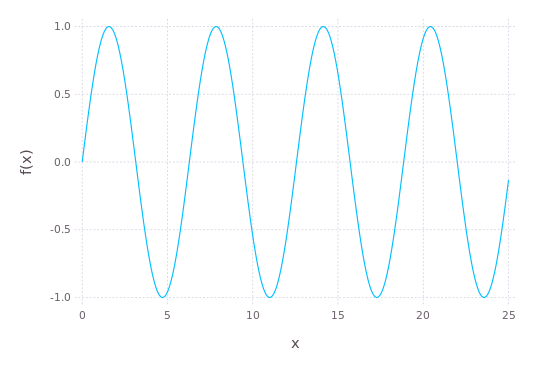

In [2]:
# this example is from the Interact.jl GitHub page: https://github.com/JuliaLang/Interact.jl
@manipulate for ϕ=0:π/16:4π, f=[:sin => sin, :cos => cos]
    plot(θ -> f(θ + ϕ), 0, 25)
end

In [3]:
using AudioIO, Interact, Gadfly

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/brad/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/brad/.julia/v0.4/IJulia/src/IJulia.jl:144
 in anonymous at task.jl:447
while loading /home/brad/.julia/v0.4/AudioIO/src/nodes.jl, in expression starting on line 16
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/brad/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/brad/.julia/v0.4/IJulia/src/IJulia.jl:144
 in anonymous at t

In [4]:
# example due to Sashi Gowda https://github.com/shashi
# source: https://github.com/JuliaLang/Interact.jl/issues/36
s1 = SinOsc(220)
s2 = SinOsc(220)
@manipulate for f1=100:880, f2 = 110:880
    s1.renderer.freq = f1
    s2.renderer.freq = f2
    plot(t->sin(f1*2pi*t) + sin(f2*2pi*t), 0, 2pi)
end
play(s1)
play(s2)
;

Interact.Slider{Int64}([Reactive.Input{Int64}] 490,"f1",490,100:880)

Interact.Slider{Int64}([Reactive.Input{Int64}] 495,"f2",495,110:880)

INFO: Initializing PortAudio. Expect errors as we scan devices
ALSA lib pcm.c:2239:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2239:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2239:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
bt_audio_service_open: connect() failed: Connection refused (111)
bt_audio_service_open: connect() failed: Connection refused (111)
bt_audio_service_open: connect() failed: Connection refused (111)
bt_audio_service_open: connect() failed: Connection refused (111)
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
 in depwarn at deprecated.jl:73
 [inlined code] from deprecated.jl:418
 in unsafe_convert at no file:417
 in Pa_OpenDefaultStream at /home/brad/.julia/v0.4/AudioIO/src/portaudio.jl:233
 in call at /home/brad/.julia/v0.4/AudioIO/src/portaudio.jl:54
 in play at /home/brad/.julia/v0.4/AudioIO/src/AudioI

In [5]:
stop(s1)
stop(s2)

In [1]:
using Colors, Compose, Interact

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/brad/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/brad/.julia/v0.4/IJulia/src/IJulia.jl:144
 in anonymous at task.jl:447
while loading /home/brad/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


Interact.Slider{Int64}([Reactive.Input{Int64}] 4,"n",4,1:8)

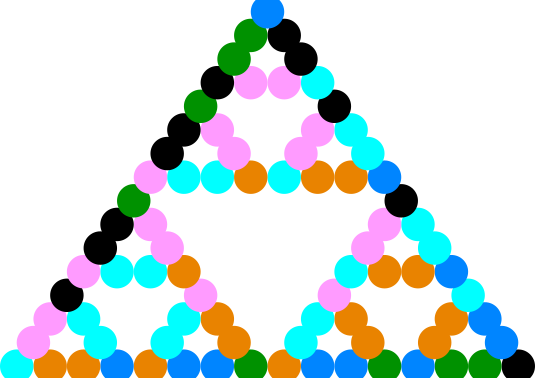

In [2]:
# example due to Steven Johnson https://github.com/stevengj
# source: https://github.com/JuliaLang/Interact.jl/issues/36
const colors = distinguishable_colors(6)
function sierpinski(n, colorindex=1)
    if n == 0
        compose(context(), circle(0.5,0.5,0.5), fill(colors[colorindex]))
    else
        colorindex = colorindex % length(colors) + 1
        t1 = sierpinski(n - 1, colorindex)
        colorindex = colorindex % length(colors) + 1
        t2 = sierpinski(n - 1, colorindex)
        colorindex = colorindex % length(colors) + 1
        t3 = sierpinski(n - 1, colorindex)
        compose(context(),
                (context(1/4,   0, 1/2, 1/2), t1),
                (context(  0, 1/2, 1/2, 1/2), t2),
                (context(1/2, 1/2, 1/2, 1/2), t3))
    end
end

@manipulate for n = 1:8
    sierpinski(n)
end

# DataFrames

Julia has a [DataFrames](https://github.com/JuliaStats/DataFrames.jl) package to help you work with data sets and tabular data.  You can also add the [RDatasets package](https://github.com/johnmyleswhite/RDatasets.jl) to access classical datasets to play around with.

In [3]:
using RDatasets
iris = dataset("datasets", "iris")
@show typeof(iris)
;

typeof(iris) = DataFrames.DataFrame


You can use DataFrames with Gadfly for R-like plotting

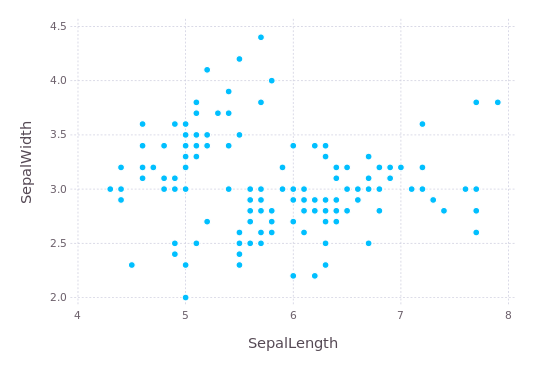

In [4]:
# example from Gadfly home: https://github.com/dcjones/Gadfly.jl
using Gadfly
plot(iris, x="SepalLength", y="SepalWidth", Geom.point)

# Exercise 1
* Add Gadfly, DataFrames, and RDatasets to your packages.
* load the "iris" dataset from the "dataset" package in RDatasets (or the dataset of your choice)
* play around with Gadfly or other plotting package, and see if you can find a cool way to visualize the data (don't just use the above example)

# Distributions

Sometimes you may want to draw random numbers from a distribution other than the normal (Julia's randn()), and uniform (Julia's rand()) distributions.  The [Distributions package](https://github.com/JuliaStats/Distributions.jl) provides these distributions for you.

In [5]:
using Distributions

In [6]:
srand(1000) # set random seed
normal_d = Normal() # create distribution

Distributions.Normal(μ=0.0, σ=1.0)

In [7]:
x = rand(normal_d, 100) # create an array of 100 random entries drawn from the distribution

100-element Array{Float64,1}:
 -1.55455  
 -1.6934   
  0.230284 
  2.07773  
 -0.0338454
  1.05643  
  0.186309 
 -0.475462 
 -0.0957289
  1.4864   
 -0.808663 
 -0.237713 
 -0.120225 
  ⋮        
 -0.28565  
  0.552137 
  0.996562 
  1.27274  
 -1.97206  
 -0.406359 
 -1.3216   
  1.46808  
 -0.832393 
  0.681133 
 -0.796682 
 -0.642259 

# Exercise 2

* combine the distributions package and interact package to visualize the pdf of an exponential distribution for different values of $\beta$.
* modify the code to visualize a different distribution of your choice.

see [univariate distributions](http://distributionsjl.readthedocs.org/en/latest/univariate.html)

# Optimization Packages

Julia's optimization packages are some of its most popular features.  You can start exploring on [http://www.juliaopt.org/](http://www.juliaopt.org/).  

If you're not familiar with numerical optimization, you may find the JuliaOpt website a bit confusing at first, so here's a basic primer:

Numerical optimization seeks to find solutions so problems that are generally of the form

$$ \min_x f(x) \qquad s.t.~c(x) \le b $$

For example, you may wish to minimize 

$$ f(x) = x^2 $$

with no constraints.  The idea is that you want to give this function to a computer and it will tell you the answer.  Yes, you can minimize this particular example by hand, but you may also wish to optimize a function that is not as trivial.

Typically, there are several layers to numerical optimization, which we can see in JuliaOpt.  The top level, which users usually interact with are algebraic modelling languages which take human-readable input and transform it into a problem that the computer can solve.  JuliaOpt's algebraic modelling languages are:
* JuMP (produced by Miles Lubin and Iain Dunning at MIT)
* Convex (similar to CVX - it also comes out of Stephen Boyd's group)

Your choice of modelling language will depend on what kind of problem you want to solve, and what you are familiar with.

The layer beneath the modelling language is MathProgBase, which standardizes interfaces to the solvers.  Solvers are at the bottom level, and they implement specific routines for particular types of optimization problems.  These do the heavy lifting for computations.

Julia also has some stand-alone packages that don't fall under this heirarchy:
* Optim
* LsqFit

Here are two examples that use optimization packages:

In [1]:
using Optim

In [4]:
f(x::Float64) = x.^2

optimize(f, 1.0, 2.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [1.000000, 2.000000]
 * Minimum: 1.000000
 * Value of Function at Minimum: 1.000000
 * Iterations: 36
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 37

In [2]:
using Convex, SCS

In [4]:
# from http://convexjl.readthedocs.org/en/latest/quick_tutorial.html
m = 4;  n = 5
A = randn(m, n); b = randn(m, 1)

# Create a (column vector) variable of size n x 1.
x = Variable(n)

# The problem is to minimize ||Ax - b||^2 subject to x >= 0
# This can be done by: minimize(objective, constraints)
problem = minimize(sum_squares(A * x - b), [x >= 0])

# Solve the problem by calling solve!
solve!(problem)

# Check the status of the problem
problem.status # :Optimal, :Infeasible, :Unbounded etc.

# Get the optimum value
problem.optval

@show x.value
;

x.value = [-7.182265800328232e-6
 -6.042113595927324e-7
 -6.509249270640664e-6
 -4.782880408265058e-6
 1.0822370345260737]
----------------------------------------------------------------------------
	SCS v1.1.5 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 31
eps = 1.00e-04, alpha = 1.80, max_iters = 20000, normalize = 1, scale = 5.00
Variables n = 8, constraints m = 15
Cones:	primal zero / dual free vars: 1
	linear vars: 6
	soc vars: 8, soc blks: 2
Setup time: 9.27e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf      -nan      -inf       inf       inf  2.94e-05 
   100| 7.19e-06  3.31e-05  1.24e-05  2.49e+00  2.49e+00  3.23e-17  1.70

# Exercise 3

* Use an optimization package to minimize the following function
$$F(x,y) = (x-1)^2 + (y-2)^2$$